In [3]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import geopandas as gpd
from shapely.geometry import Point

# Weather Station features

In [12]:
base_url = 'https://api.weather.gc.ca/collections/climate-stations/items'
complete_url = f'{base_url}?&PROV_STATE_TERR_CODE=BC'
response = requests.get(base_url)
station_data = response.json()
for station in station_data:
    print(station)

type
features
numberMatched
numberReturned
links
timeStamp


## Number of weather stations in Canada

In [11]:
base_url = 'https://api.weather.gc.ca/collections/climate-stations/items'
response = requests.get(base_url)
station_data = response.json()
print(station_data['numberMatched'], station_data['numberReturned'])

8552 500


## Number of weather stations in BC

In [13]:
base_url = 'https://api.weather.gc.ca/collections/climate-stations/items?&PROV_STATE_TERR_CODE=BC'
response = requests.get(base_url)
station_data = response.json()
print(station_data['numberMatched'], station_data['numberReturned'])

1750 500


## Number of weather stations in Metro Vancovuer

In [18]:
base_url = 'https://api.weather.gc.ca/collections/climate-stations/items'
complete_url = f'{base_url}?&bbox=-123.264,49.002,-122.313,49.494'
response = requests.get(complete_url)
station_data = response.json()
print(station_data['numberMatched'], station_data['numberReturned'])

246 246


# Extracting features of Climate Stations

In [22]:
columns = list(station_data['features'][0]['properties'].keys()) + ['long', 'lat']
values = [list(station_data['features'][i]['properties'].values())+ station_data['features'][i]['geometry']['coordinates'] for i in range(len(station_data['features']))]
dataframe = pd.DataFrame(values, columns=columns)
dataframe.drop(columns=['LATITUDE', 'LONGITUDE'], inplace=True)

## Filtering Dataframe

In [24]:
columns_tbkept = ['STN_ID', 'STATION_NAME', 'lat', 'long', 'ELEVATION', 'FIRST_DATE', 'LAST_DATE', 'HLY_FIRST_DATE', 
                  'HLY_LAST_DATE', 'DLY_FIRST_DATE', 'DLY_LAST_DATE', 'HAS_HOURLY_DATA']
dataframe_filt = dataframe[columns_tbkept]
dataframe_filt['LAST_DATE'] = pd.to_datetime(dataframe_filt['LAST_DATE'])
dataframe_filt = dataframe_filt[dataframe_filt['LAST_DATE'].dt.year>=2020]
dataframe_filt_hourly = dataframe_filt[dataframe_filt['HAS_HOURLY_DATA']=='Y']
dataframe_filt_daily = dataframe_filt[dataframe_filt['HAS_HOURLY_DATA']=='N']
print(len(dataframe_filt_hourly), len(dataframe_filt_daily))

9 11


C:\Users\user\AppData\Local\Temp\ipykernel_13008\3126712879.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_filt['LAST_DATE'] = pd.to_datetime(dataframe_filt['LAST_DATE'])


## Visualizing weather station location

In [25]:
data_hourly = pd.DataFrame({
    'latitude': dataframe_filt_hourly['lat'],  # Vancouver coordinates
    'longitude': dataframe_filt_hourly['long']
})

# Create a GeoDataFrame from the latitude and longitude points
gdf_hourly = gpd.GeoDataFrame(
    data_hourly, 
    geometry=[Point(xy) for xy in zip(dataframe_filt_hourly['long'], dataframe_filt_hourly['lat'])],
    crs="EPSG:4326"  # WGS84 coordinate system
)

data_daily = pd.DataFrame({
    'latitude': dataframe_filt_daily['lat'],  # Vancouver coordinates
    'longitude': dataframe_filt_daily['long']
})

# Create a GeoDataFrame from the latitude and longitude points
gdf_daily = gpd.GeoDataFrame(
    data_daily, 
    geometry=[Point(xy) for xy in zip(dataframe_filt_daily['long'], dataframe_filt_daily['lat'])],
    crs="EPSG:4326"  # WGS84 coordinate system
)

In [26]:
gdf_daily

,latitude,longitude,geometry
22,49.314783,-123.115278,POINT (-123.11528 49.31478)
23,49.279167,-122.881389,POINT (-122.88139 49.27917)
33,49.144667,-122.551000,POINT (-122.551 49.14467)
46,49.437518,-122.966946,POINT (-122.96695 49.43752)
51,49.278389,-122.918044,POINT (-122.91804 49.27839)
59,49.381112,-123.078334,POINT (-123.07833 49.38111)
61,49.170833,-123.093056,POINT (-123.09306 49.17083)
141,49.010944,-123.093333,POINT (-123.09333 49.01094)
152,49.178611,-123.086944,POINT (-123.08694 49.17861)
194,49.264472,-122.573167,POINT (-122.57317 49.26447)


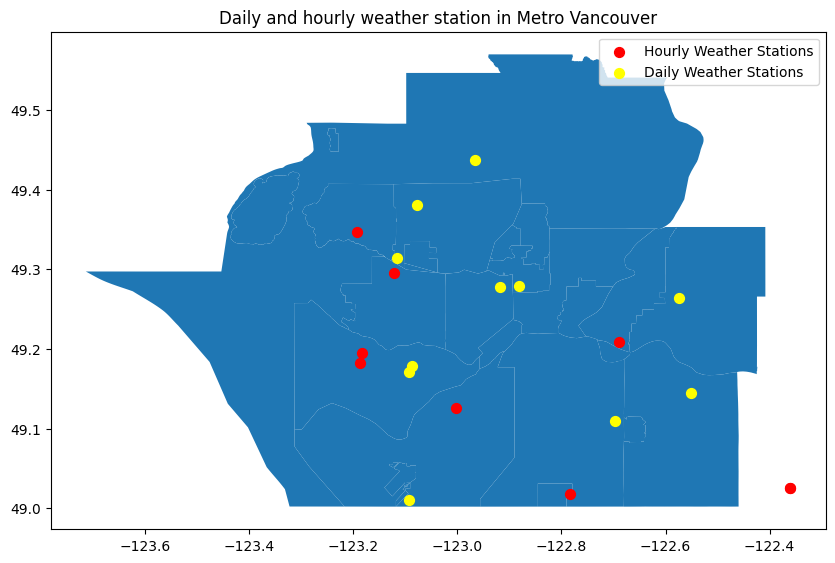

In [28]:
vancouver_map = gpd.read_file('D:\\Is-it-Vancouver-or-is-it-raincouver\\metro_van\\Administrative_Boundaries.shp')
vancouver_map = vancouver_map.to_crs(epsg=4326)
fig, ax = plt.subplots(figsize=(10, 14))
vancouver_map.plot(ax=ax)  # Plot the map
gdf_hourly.plot(ax=ax, color='red', markersize=50, label='Hourly Weather Stations')  # Plot the points
gdf_daily.plot(ax=ax, color='yellow', markersize=50, label='Daily Weather Stations')  # Plot the points
plt.legend()
plt.title("Daily and hourly weather station in Metro Vancouver")
plt.show()

In [117]:
for i in range(11):
    print(daily_latitude[i], daily_longitude[i])

49.185322 -123.0655
49.1645 -122.5253
49.08408 -122.33036
49.2615066 -122.5801007
49.16422 -122.550496
49.2252002 -123.0442004
49.1015 -123.0535
49.00394 -123.0536
49.1043 -123.0513
49.15521 -122.34234
49.063295 -122.415135


In [118]:
dataframe_filt_daily

,STN_ID,STATION_NAME,LATITUDE,LONGITUDE,ELEVATION,FIRST_DATE,LAST_DATE,HLY_FIRST_DATE,HLY_LAST_DATE,DLY_FIRST_DATE,DLY_LAST_DATE,HAS_HOURLY_DATA
22,833,N VANCOUVER WHARVES,491853220,-1230655000,7.00,1962-01-01 00:00:00,2024-09-20,None,None,1962-03-01 00:00:00,2024-09-20 00:00:00,N
23,834,PORT MOODY GLENAYRE,491645000,-1225253000,129.50,1970-01-01 00:00:00,2024-09-20,None,None,1970-11-01 00:00:00,2024-09-20 00:00:00,N
33,43723,FORT LANGLEY TELEGRAPH TRAIL,490840800,-1223303600,76.00,2005-04-01 00:00:00,2024-09-20,None,None,2005-04-01 00:00:00,2024-09-20 00:00:00,N
46,698,N VAN SEYMOUR HATCHERY,492615066,-1225801007,177.00,1981-01-01 00:00:00,2024-09-19,None,None,1981-11-01 00:00:00,2024-09-19 00:00:00,N
51,731,BURNABY SIMON FRASER U,491642200,-1225504960,365.80,1965-01-01 00:00:00,2022-06-04,None,None,1965-02-01 00:00:00,2022-06-04 00:00:00,N
59,823,N VANC GROUSE MTN RESORT,492252002,-1230442004,1103.00,1971-01-01 00:00:00,2024-09-11,None,None,1971-10-01 00:00:00,2024-09-11 00:00:00,N
61,837,RICHMOND NATURE PARK,491015000,-1230535000,3.00,1977-01-01 00:00:00,2024-09-20,None,None,1977-03-01 00:00:00,2024-09-20 00:00:00,N
141,766,DELTA TSAWWASSEN BEACH,490039400,-1230536000,2.40,1971-01-01 00:00:00,2024-08-21,None,None,1971-03-01 00:00:00,2024-08-21 00:00:00,N
152,853,RICHMOND DALLYN 2,491043000,-1230513000,1.80,1963-01-01 00:00:00,2024-09-20,None,None,1963-11-01 00:00:00,2024-09-20 00:00:00,N
194,776,HANEY UBC RF ADMIN,491552100,-1223423400,147.00,1961-01-01 00:00:00,2024-05-30,None,None,1961-10-01 00:00:00,2024-05-30 00:00:00,N
